<a href="https://colab.research.google.com/github/ferngndo/geoprocessing/blob/main/Calculando_%C3%A1rea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install geopandas -q

import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
shapefile = '/content/RJ_Municipios_2022.shp'

rj_shp = gpd.read_file(shapefile)
type(rj_shp)

geopandas.geodataframe.GeoDataFrame

In [4]:
rj_shp.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


<Axes: >

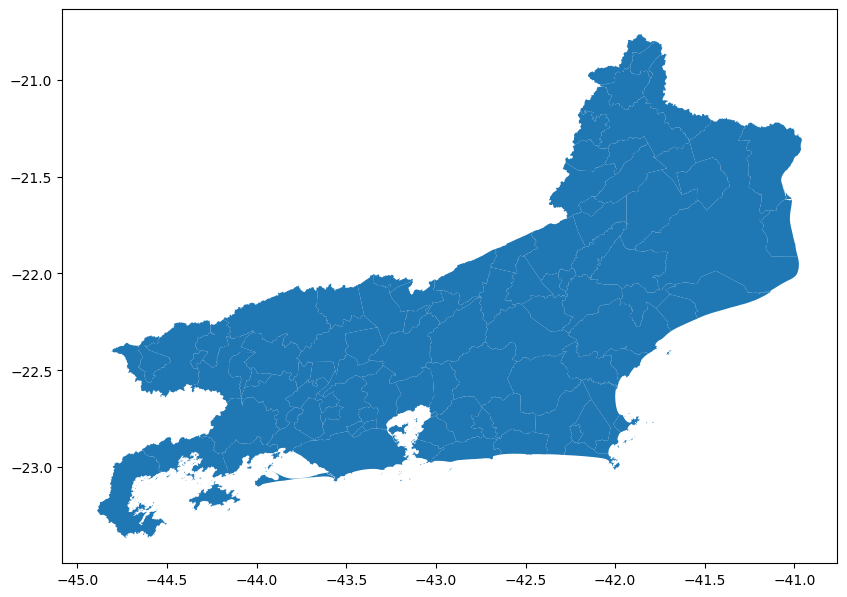

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

rj_shp.plot(ax=ax)

(array([-23.5, -23. , -22.5, -22. , -21.5, -21. , -20.5]),
 [Text(0, -23.5, '−23.5'),
  Text(0, -23.0, '−23.0'),
  Text(0, -22.5, '−22.5'),
  Text(0, -22.0, '−22.0'),
  Text(0, -21.5, '−21.5'),
  Text(0, -21.0, '−21.0'),
  Text(0, -20.5, '−20.5')])

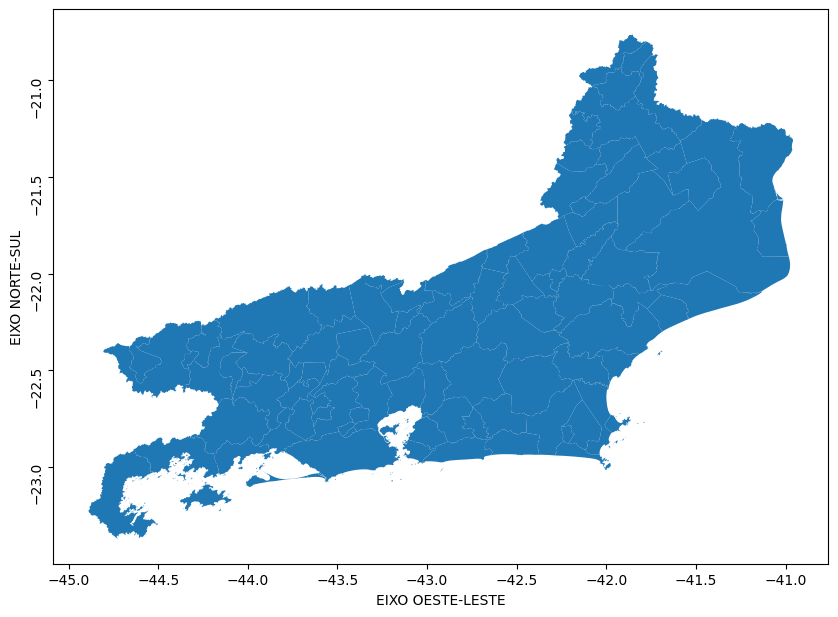

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

rj_shp.plot(ax=ax)

ax.set_ylabel('EIXO NORTE-SUL')
ax.set_xlabel('EIXO OESTE-LESTE')
ax.ticklabel_format(style='plain')
plt.yticks(rotation=90)

In [10]:
rj_niteroi = rj_shp[rj_shp.NM_MUN=='Niterói']
rj_niteroi

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
47,3303302,Niterói,RJ,133.757,"MULTIPOLYGON (((-43.07289 -22.95674, -43.07383..."


In [11]:
output = '/content/RJ_Municipios_2022_Niteroi.shp'
rj_niteroi.to_file(output)

<Axes: >

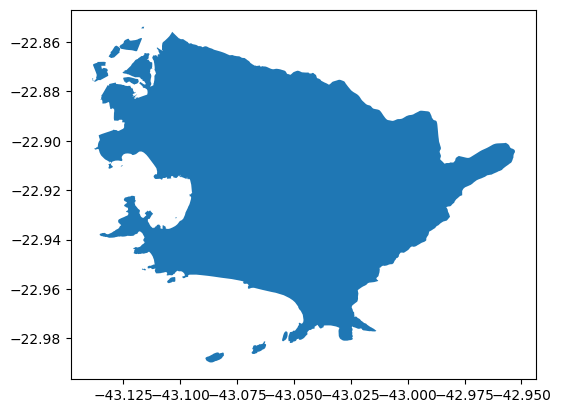

In [14]:
niteroi_shp = '/content/RJ_Municipios_2022_Niteroi.shp'
nit_rj = gpd.read_file(niteroi_shp)
nit_rj.plot()

(array([-23.  , -22.98, -22.96, -22.94, -22.92, -22.9 , -22.88, -22.86,
        -22.84]),
 [Text(0, -23.0, '−23.00'),
  Text(0, -22.98, '−22.98'),
  Text(0, -22.96, '−22.96'),
  Text(0, -22.939999999999998, '−22.94'),
  Text(0, -22.92, '−22.92'),
  Text(0, -22.9, '−22.90'),
  Text(0, -22.880000000000003, '−22.88'),
  Text(0, -22.86, '−22.86'),
  Text(0, -22.84, '−22.84')])

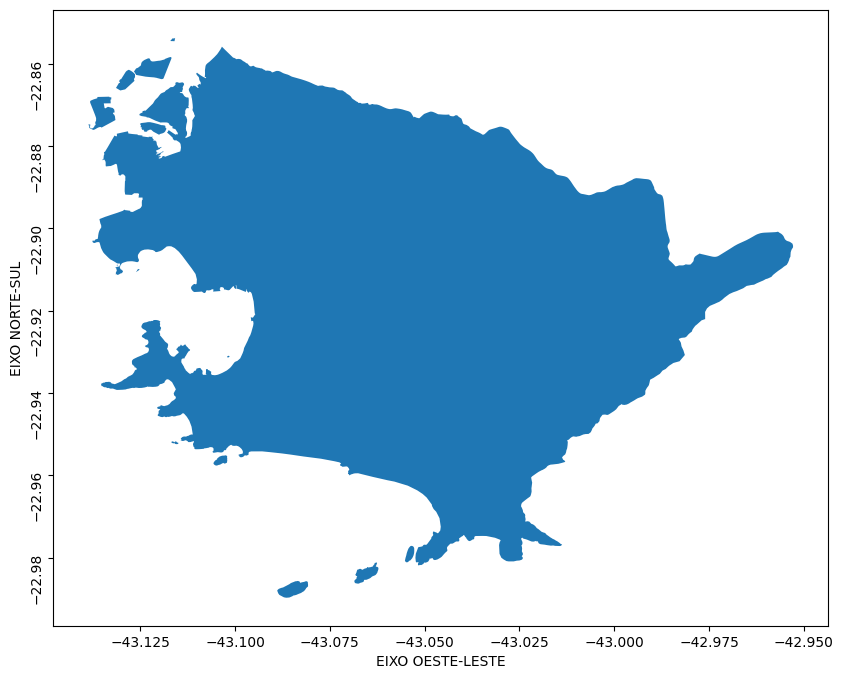

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

nit_rj.plot(ax=ax)

ax.set_ylabel('EIXO NORTE-SUL')
ax.set_xlabel('EIXO OESTE-LESTE')
ax.ticklabel_format(style='plain')
plt.yticks(rotation=90)

In [17]:
for index,row in rj_shp[0:5].iterrows():
  plg_area=row["geometry"].area
  print("A área de {0} é : {1:.2f}".format(row["NM_MUN"], plg_area))

A área de Angra dos Reis é : 0.07
A área de Aperibé é : 0.01
A área de Araruama é : 0.06
A área de Areal é : 0.01
A área de Armação dos Búzios é : 0.01


In [18]:
rj_proj=rj_shp.to_crs(epsg=31983)
rj_proj.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
for index,row in rj_proj[0:5].iterrows():
  plg_area=row["geometry"].area
  print("A área de {0} é : {1:.2f}".format(row["NM_MUN"], plg_area))

A área de Angra dos Reis é : 812860762.14
A área de Aperibé é : 94671858.97
A área de Araruama é : 638985397.69
A área de Areal é : 110737815.50
A área de Armação dos Búzios é : 71092758.56


In [21]:
rj_proj['area_km2']=rj_proj.area/1000000
rj_proj.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,area_km2
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((549537.656 7452425.256, 549554...",812.860762
1,3300159,Aperibé,RJ,94.542,"POLYGON ((798752.837 7607341.240, 798797.174 7...",94.671859
2,3300209,Araruama,RJ,638.276,"POLYGON ((778538.678 7460627.768, 778491.716 7...",638.985398
3,3300225,Areal,RJ,110.724,"POLYGON ((696842.952 7539538.742, 696705.538 7...",110.737816
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((816410.699 7478465.998, 816429...",71.092759


In [22]:
rj_proj['area_km2'].head(5)

0    812.860762
1     94.671859
2    638.985398
3    110.737816
4     71.092759
Name: area_km2, dtype: float64

In [23]:
max_area=rj_proj["area_km2"].max()
ave_area=rj_proj["area_km2"].mean()

print("Área máxima: %s \nÁrea média: %s"%( round(max_area,2), round(ave_area,2)))

Área máxima: 4043.1 
Área média: 475.98
